In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/dataset_diabetes_diabetic_data.csv")
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,No,No
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,Ch,Yes
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,Yes
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,Ch,Yes
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,Ch,Yes


In [3]:
df.shape

(70180, 20)

In [4]:
df.isnull().sum()

patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
change                      0
diabatic                    0
dtype: int64

In [5]:
df.nunique()

patient_nbr                 52500
race                            6
gender                          3
age                            10
admission_type_id               8
discharge_disposition_id       26
admission_source_id            13
time_in_hospital               14
num_lab_procedures            116
num_procedures                  7
num_medications                74
number_outpatient              29
number_emergency               19
number_inpatient               21
diag_1                        685
diag_2                        702
diag_3                        727
number_diagnoses               16
change                          2
diabatic                        2
dtype: int64

In [6]:
df.drop(columns="patient_nbr",axis=1,inplace=True)

In [7]:
df.dtypes

race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
change                      object
diabatic                    object
dtype: object

In [8]:
df.drop('diag_1',inplace=True,axis=1)
df.drop('diag_2',inplace=True,axis=1)
df.drop('diag_3',inplace=True,axis=1)

In [9]:
df.drop_duplicates(keep='first',inplace=True)

In [10]:
df.shape

(70158, 16)

**Correlation**

In [13]:
df_num = pd.DataFrame()
df_cat = pd.DataFrame()
for i in df.columns:
    if df[i].dtype == object:
        df_cat[i] = df[i]
    else:
        df_num[i] = df[i]

In [14]:
corr = df_num.corr()
corr

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
admission_type_id,1.000000,0.096843,0.205692,-0.020958,-0.157771,0.103396,0.095360,0.062063,-0.004614,-0.032951,-0.090410
discharge_disposition_id,0.096843,1.000000,0.018261,0.157765,0.004325,0.018338,0.114946,-0.013898,-0.025384,0.018284,0.057877
admission_source_id,0.205692,0.018261,1.000000,-0.015337,-0.015556,-0.136305,-0.040301,0.071148,0.082623,0.036809,0.081212
time_in_hospital,-0.020958,0.157765,-0.015337,1.000000,0.285691,0.201898,0.464550,-0.014692,-0.017003,0.079090,0.236999
num_lab_procedures,-0.157771,0.004325,-0.015556,0.285691,1.000000,0.068522,0.239878,-0.014265,-0.015748,0.045621,0.133977
num_procedures,0.103396,0.018338,-0.136305,0.201898,0.068522,1.000000,0.401177,-0.018384,-0.040267,-0.063431,0.083442
num_medications,0.095360,0.114946,-0.040301,0.464550,0.239878,0.401177,1.000000,0.040791,0.013059,0.058786,0.242548
number_outpatient,0.062063,-0.013898,0.071148,-0.014692,-0.014265,-0.018384,0.040791,1.000000,0.115870,0.104589,0.096658
number_emergency,-0.004614,-0.025384,0.082623,-0.017003,-0.015748,-0.040267,0.013059,0.115870,1.000000,0.256632,0.053267
number_inpatient,-0.032951,0.018284,0.036809,0.079090,0.045621,-0.063431,0.058786,0.104589,0.256632,1.000000,0.112751


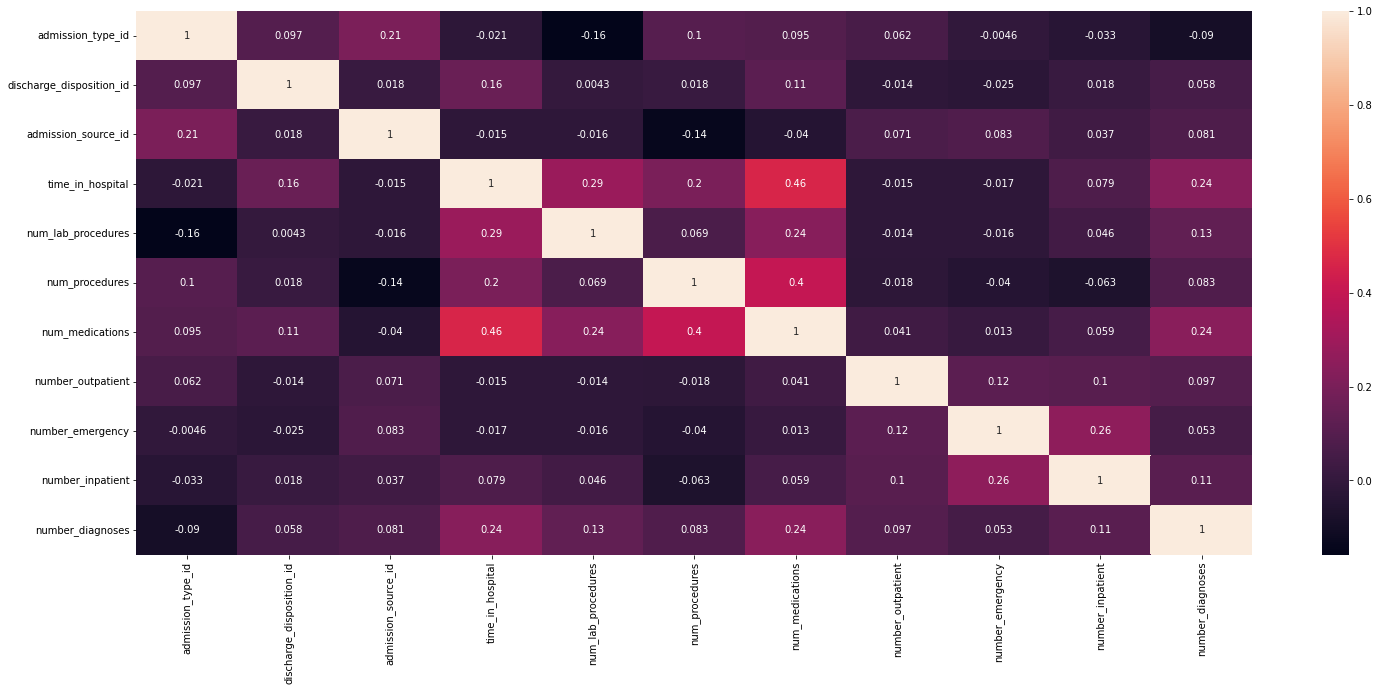

In [16]:
plt.figure(figsize = (25,10))
sns.heatmap(corr,annot = True)

In [17]:
df["race"].replace("?",np.nan,inplace = True)
df.dropna(subset = ["race"],inplace = True)

**Encoding**

In [18]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()


In [20]:
df["race"] = label.fit_transform(df["race"])
df["age"] = label.fit_transform(df["age"])
df["gender"] = label.fit_transform(df["gender"])
df["change"] = label.fit_transform(df["change"])
df["diabatic"] = label.fit_transform(df["diabatic"])

In [26]:
X=df.drop("diabatic",axis=1)
Y=df.diabatic

**Test and Train**

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=10)

**Decision Tree** 





In [30]:
M= DecisionTreeClassifier()

In [31]:
M.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
y_pred =M.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,auc
accuracy_score(y_pred,y_test)

0.710334788937409

In [36]:
confusion_matrix(y_test,M.predict(X_test))

array([[ 3813,  3073],
       [ 2897, 10827]])

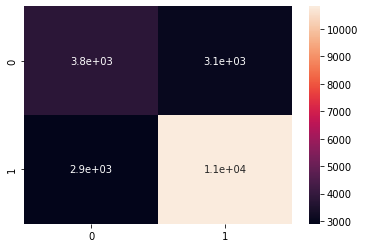

In [37]:
sns.heatmap(confusion_matrix(y_test,M.predict(X_test)),annot = True)

**Random Forest **

In [38]:
m_rf = RandomForestClassifier(max_depth= 2, random_state=0)
m_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [40]:
accuracy_score(M.predict(X_test),y_test)

0.710334788937409

In [41]:
p= m_rf.predict_proba(X_test)


In [42]:
from sklearn.metrics import roc_curve
f, t, tr = roc_curve(y_test, p[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
pt, ptr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [43]:
auc_score1 = roc_auc_score(y_test, p[:,1])

In [44]:
print(auc_score1)

0.8222483304950599


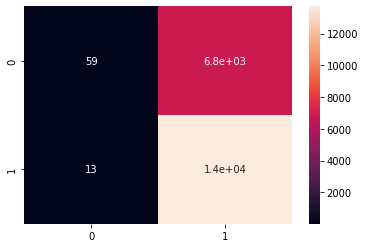

In [46]:
sns.heatmap(confusion_matrix(y_test,m_rf.predict(X_test)),annot = True)